<a href="https://colab.research.google.com/github/RakshithaMaddala/OIBSIP/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/sample_data/AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
print("datasetshape:",df.shape)
print("\n column names:",df.columns)
print("\n data types :\n",df.dtypes)

datasetshape: (48895, 16)

 column names: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

 data types :
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64


In [6]:
print("\n missing values are:\n",df.isnull().sum())


 missing values are:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [7]:
print("\n duplicate rows:",df.duplicated().sum())


 duplicate rows: 0


In [17]:
for col in df.select_dtypes(include='object').columns:
  print(f"\n unique values in {col}:{ df[col].nunique()}")


 unique values in name:47905

 unique values in host_name:11452

 unique values in neighbourhood_group:5

 unique values in neighbourhood:221

 unique values in room_type:3

 unique values in last_review:1764


In [19]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [21]:
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols]=df[num_cols].apply(lambda x: x.fillna(x.median()))

In [22]:
cat_cols=df.select_dtypes(include='object').columns
df[cat_cols]=df[cat_cols].apply(lambda x:x.fillna(x.mode()[0]))

In [6]:
print("duplicates before:",df.duplicated().sum())
df=df.drop_duplicates()
print("duiplicates after:",df.duplicated().sum())

duplicates before: 0
duiplicates after: 0


In [8]:
df['neighbourhood_group']=df['neighbourhood_group'].str.title().str.strip()
df['neighbourhood']=df['neighbourhood'].str.title().str.strip()
df['room_type']=df['room_type'].str.title().str.strip()

In [9]:
df=df[df['price']>0]

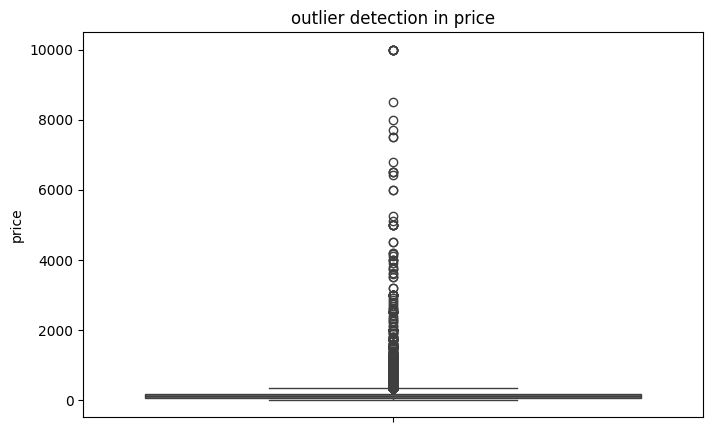

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(df['price'])
plt.title('outlier detection in price')
plt.show()

In [11]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr= q3-q1
df=df[(df['price']>= q1- 1.5* iqr)&(df['price']<=q3+1.5 *iqr)]

In [13]:
df.to_csv('cleaned_airbnb_data.csv',index=False)
print("cleaned dataset saved successfully!")

cleaned dataset saved successfully!
